# -- START: Techical Requirements --

In [1]:
import matplotlib 
import pandas as pd
import scipy 
import statsmodels

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
scipy -> {scipy.__version__}
statsmodels -> {statsmodels.__version__}
''')


Matplotlib -> 3.5.1
pandas -> 1.4.1   
scipy -> 1.7.3
statsmodels -> 0.11.1



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


import warnings


warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16, 3]

### Create DataFrames 

In [3]:
file = Path("../../datasets/Ch8/nyc_taxi.csv")

nyc_taxi = pd.read_csv(file, 
                     index_col='timestamp', 
                     parse_dates=True)

In [4]:
def plot_outliers(outliers, data, method='KNN',
                 halignment = 'right', 
                 valignment = 'top',
                 labels=False):

    ax = data.plot(alpha=0.6)
    
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'v', markersize=8, markerfacecolor='none', markeredgecolor='k')
            plt.text(i[0], i[1]-(i[1]*0.04), f'{i[0].strftime("%m/%d")}', 
                         horizontalalignment=halignment,
                         verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')
        
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

### Visualize DataFrames

In [5]:
nyc_taxi.index

DatetimeIndex(['2014-07-01 00:00:00', '2014-07-01 00:30:00',
               '2014-07-01 01:00:00', '2014-07-01 01:30:00',
               '2014-07-01 02:00:00', '2014-07-01 02:30:00',
               '2014-07-01 03:00:00', '2014-07-01 03:30:00',
               '2014-07-01 04:00:00', '2014-07-01 04:30:00',
               ...
               '2015-01-31 19:00:00', '2015-01-31 19:30:00',
               '2015-01-31 20:00:00', '2015-01-31 20:30:00',
               '2015-01-31 21:00:00', '2015-01-31 21:30:00',
               '2015-01-31 22:00:00', '2015-01-31 22:30:00',
               '2015-01-31 23:00:00', '2015-01-31 23:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=10320, freq=None)

In [6]:
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"
]
tx = nyc_taxi.resample('D').mean()
known_outliers = tx.loc[nyc_dates]

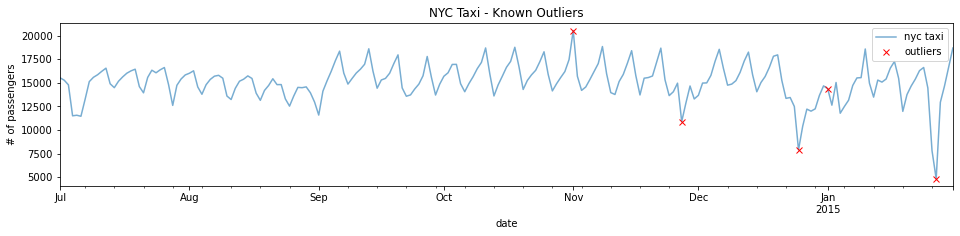

In [7]:
plot_outliers(known_outliers, tx, 'Known Outliers')

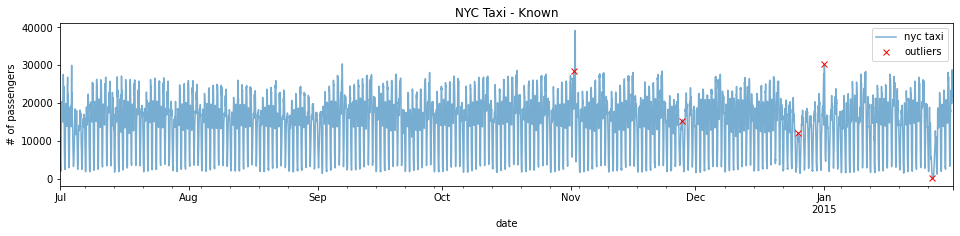

In [8]:
dt = [
        "2014-11-01 19:00:00.000000",
        "2014-11-27 15:30:00.000000",
        "2014-12-25 15:00:00.000000",
        "2015-01-01 01:00:00.000000",
        "2015-01-27 00:00:00.000000"
    ]
kout = nyc_taxi.loc[dt]
plot_outliers(kout, nyc_taxi, 'Known')

# Detecting Outliers Using Local Outlier Factor LOF

In [138]:
from pyod.models.lof import LOF

In [139]:
# !conda list pyod

In [140]:
lof = LOF(contamination=0.03, n_neighbors=5)

In [141]:
lof.fit(tx)

LOF(algorithm='auto', contamination=0.03, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=5, novelty=True, p=2)

In [142]:
predicted = pd.Series(lof.predict(tx), 
                      index=tx.index)

In [143]:
print('Number of outliers = ', predicted.sum())

Number of outliers =  6


In [144]:
tx.loc[nyc_dates]

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


In [145]:
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-10-31,17473.354167
2014-11-01,20553.500000
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


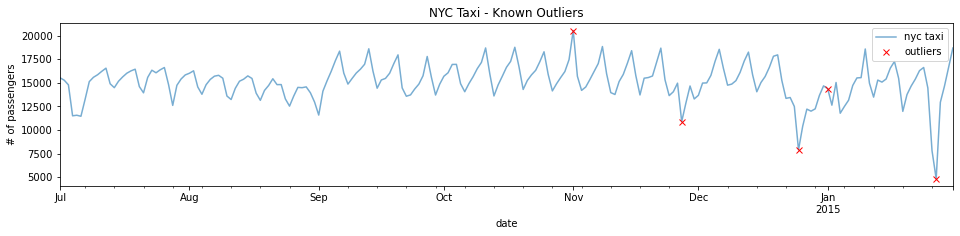

In [146]:
plot_outliers(known_outliers, tx, 'Known Outliers')

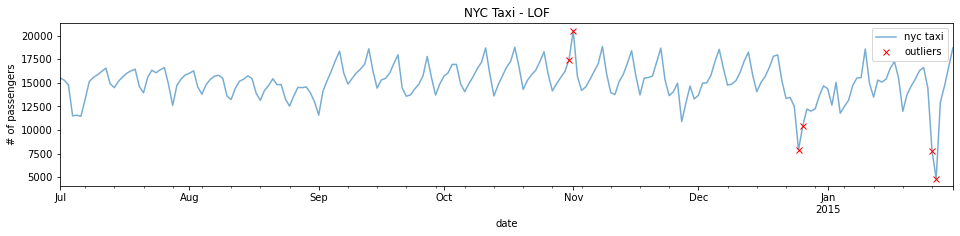

In [147]:
plot_outliers(outliers, tx, 'LOF')

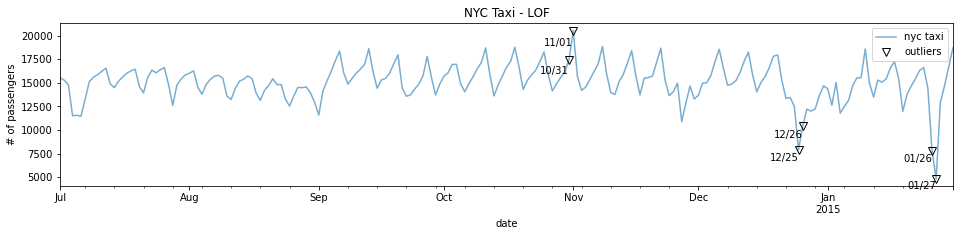

In [148]:
plot_outliers(outliers, tx, 'LOF', labels=True)

## There is more

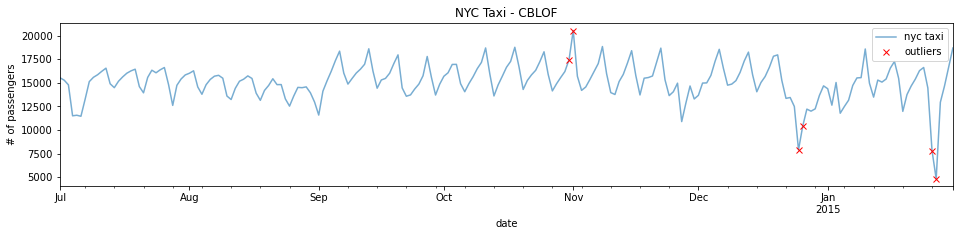

In [149]:
from pyod.models.cblof import CBLOF
cblof = CBLOF(n_clusters=4, contamination=0.03)
cblof.fit(tx)
predicted = pd.Series(lof.predict(tx), 
                      index=tx.index)
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
plot_outliers(outliers, tx, 'CBLOF')

# Detecting Outliers using K-Nearest Neighbors

In [318]:
from pyod.models.knn import KNN

In [319]:
# !conda list pyod

In [320]:
knn = KNN(contamination=0.03,
          method='mean',
          n_neighbors=5)

In [334]:
knn.fit(tx)

KNN(algorithm='auto', contamination=0.03, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [335]:
predicted = pd.Series(knn.predict(tx), 
                      index=tx.index)

In [336]:
print('Number of outliers = ', predicted.sum())

Number of outliers =  6


In [337]:
tx.loc[nyc_dates]

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


In [338]:
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


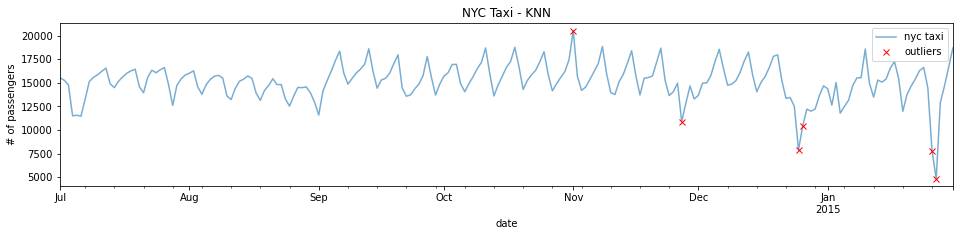

In [339]:
plot_outliers(outliers, tx, 'KNN')

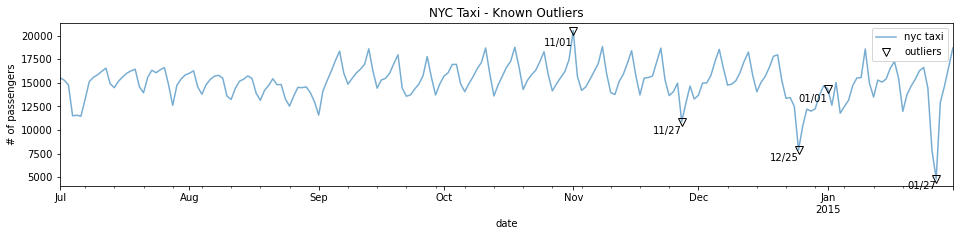

In [340]:
plot_outliers(known_outliers, tx, 'Known Outliers', labels=True)

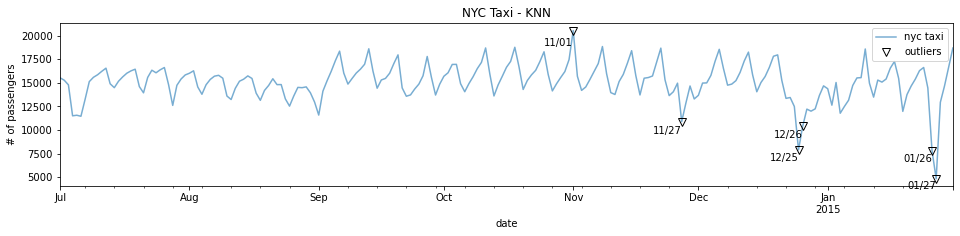

In [341]:
plot_outliers(outliers, 
              tx, 
              'KNN',
              labels=True)

## There is more

In [120]:
predict_proba = pd.Series(knn.predict_proba(tx)[:, 1], 
                      index=tx.index, name='proba_outlier') * 100
predict_proba.nlargest(6)

timestamp
2015-01-27    72.662672
2015-01-26    35.744175
2014-12-25    35.401327
2014-11-01    29.318042
2014-12-26    15.658527
2014-11-27     9.452226
Name: proba_outlier, dtype: float64

In [119]:
decision_score = pd.Series(knn.decision_scores_, 
                      index=tx.index, name='decision_scores')
decision_score.nlargest(6)

timestamp
2015-01-27    4862.058333
2015-01-26    2474.508333
2014-12-25    2441.250000
2014-11-01    1806.850000
2014-12-26    1009.616667
2014-11-27     608.250000
Name: decision_scores, dtype: float64

In [105]:
anomaly_scores = pd.concat([decision_score, predict_proba], axis=1)
anomaly_scores.nlargest(10, columns=['decision_scores'])

,decision_scores,proba_outlier
timestamp,,
2015-01-27,4862.058333,72.662672
2015-01-26,2474.508333,35.744175
2014-12-25,2441.250000,35.401327
2014-11-01,1806.850000,29.318042
2014-12-26,1009.616667,15.658527
2014-11-27,608.250000,9.452226
2014-09-27,225.604167,2.628868
2014-07-06,224.208333,2.242038
2014-12-28,223.562500,2.656358


In [121]:
def knn_anomaly(df, method='mean', top=10, k=5):
    knn = KNN(contamination=0.1,
              method=method,
              n_neighbors=k)
    knn.fit(tx)
    
    predict_proba  = pd.Series(knn.predict_proba(tx)[:, 1], 
                          index=tx.index, name='proba_outlier') * 100
    
    decision_score = pd.Series(knn.decision_scores_, 
                          index=tx.index, name='decision_scores')
    
    anomaly_scores = pd.concat([decision_score, predict_proba], axis=1)
    outliers = anomaly_scores.nlargest(top, columns=['decision_scores'])
    
    return outliers

In [123]:
known_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


In [122]:
for method in ['mean', 'median', 'largest']:
    print(f'Method: {method}')
    print(knn_anomaly(tx, method=method, top=8, k=5))

Method: mean
            decision_scores  proba_outlier
timestamp                                 
2015-01-27      4862.058333      72.662672
2015-01-26      2474.508333      35.744175
2014-12-25      2441.250000      35.401327
2014-11-01      1806.850000      29.318042
2014-12-26      1009.616667      15.658527
2014-11-27       608.250000       9.452226
2014-09-27       225.604167       2.628868
2014-07-06       224.208333       2.242038
Method: median
            decision_scores  proba_outlier
timestamp                                 
2015-01-27      5563.416667      55.129910
2014-12-25      2997.541667      44.850989
2015-01-26      2984.437500      46.345784
2014-11-01      1847.083333      31.883607
2014-12-26      1113.812500      19.151064
2014-11-27       612.104167      10.131352
2014-12-29       251.520833       4.398617
2014-12-27       238.062500       3.867143
Method: largest
            decision_scores  proba_outlier
timestamp                                 
2015-01-27

# Detecting Outliers using Isolation Forests

In [215]:
from pyod.models.iforest import IForest

In [216]:
iforest = IForest(contamination=0.03,
                 n_estimators=100)
iforest.fit(tx)

IForest(behaviour='old', bootstrap=False, contamination=0.03,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0)

In [217]:
predicted = pd.Series(iforest.predict(tx), 
                      index=tx.index)

In [218]:
print('Number of outliers = ', predicted.sum())

Number of outliers =  7


In [219]:
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-08,18857.333333
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


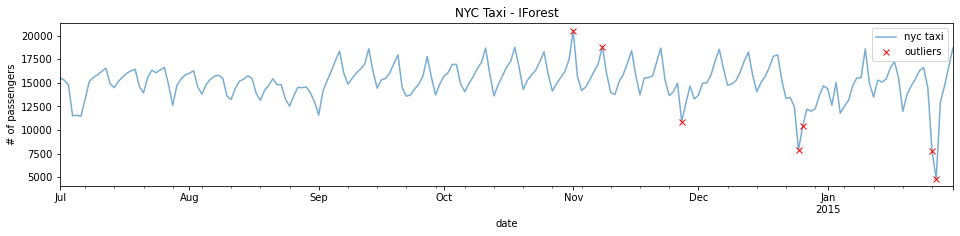

In [220]:
plot_outliers(outliers, tx, 'IForest')

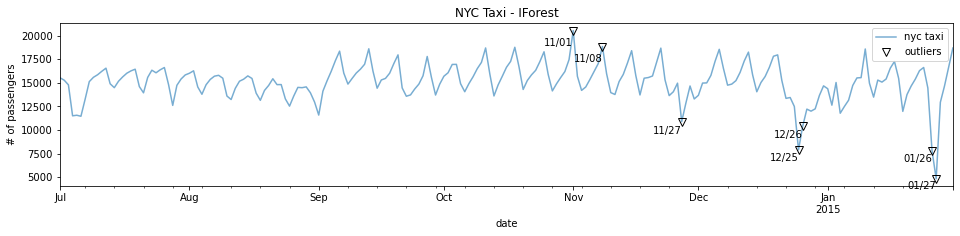

In [221]:
plot_outliers(outliers, 
              tx, 
              'IForest',
              labels=True)

## There is more

In [222]:
import sklearn
sklearn.__version__

'1.0.2'

In [223]:
from sklearn.ensemble import IsolationForest

In [224]:
sk_iforest = IsolationForest(contamination=0.03)
sk_prediction = pd.Series(sk_iforest.fit_predict(tx), 
                      index=tx.index)
sk_outliers = sk_prediction[sk_prediction == -1]
sk_outliers = tx.loc[sk_outliers.index] 
sk_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-08,18857.333333
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


# Detecing Outliers using Copula-Based Outlier Detection (COPOD)

In [366]:
from pyod.models.copod import COPOD

In [367]:
copod = COPOD(contamination=0.03)
copod.fit(tx)

COPOD(contamination=0.03, n_jobs=1)

In [368]:
predicted = pd.Series(copod.predict(tx), 
                      index=tx.index)

In [369]:
print('Number of outliers = ', predicted.sum())

Number of outliers =  7


In [370]:
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-07-04,11511.770833
2014-07-06,11464.270833
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


In [371]:
known_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


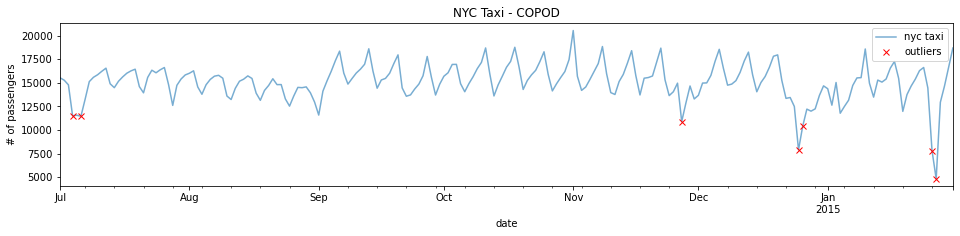

In [231]:
plot_outliers(outliers, tx, 'COPOD')

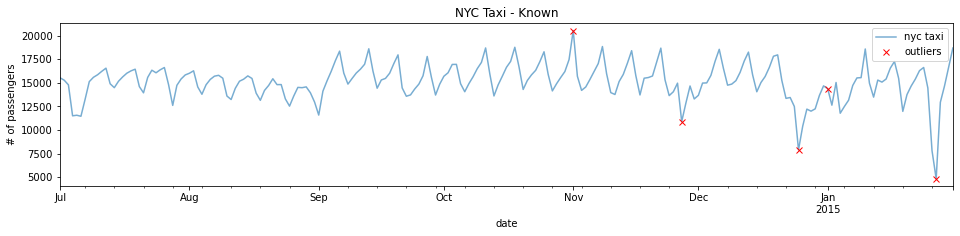

In [232]:
plot_outliers(known_outliers, tx, 'Known')

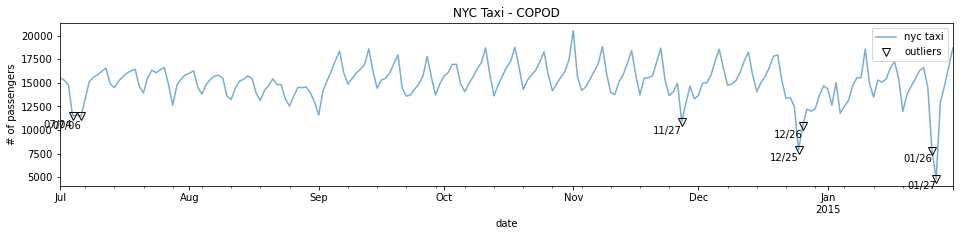

In [233]:
plot_outliers(outliers, 
              tx, 
              'COPOD',
              labels=True)

## There is more

In [559]:
from pyod.models.mad import MAD

In [569]:
mad = MAD(threshold=3)

In [578]:
predicted = pd.Series(mad.fit_predict(tx), 
                      index=tx.index)
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 

In [579]:
outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


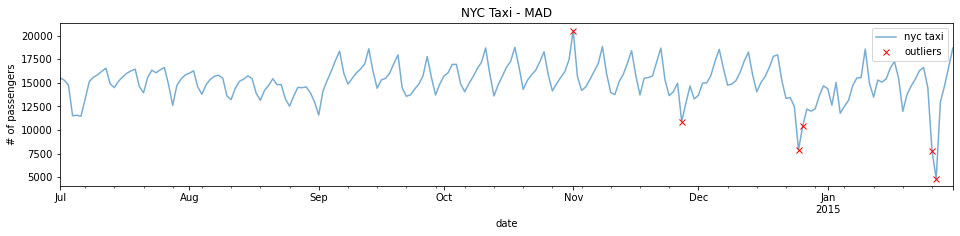

In [580]:
plot_outliers(outliers, tx, 'MAD')

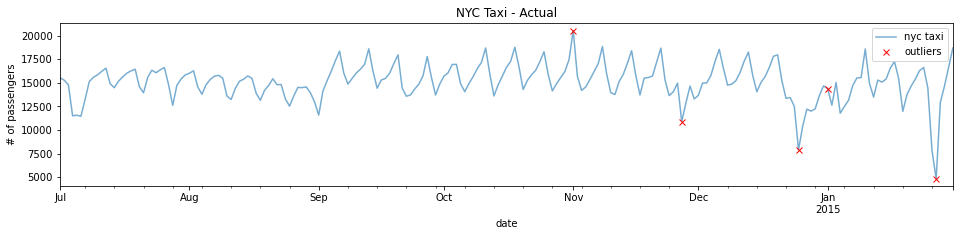

In [568]:
plot_outliers(known_outliers, tx, 'Actual')

In [219]:
from pyod.models.loda import LODA

In [236]:
loda = LODA(contamination=0.03)
loda.fit(tx)

LODA(contamination=0.03, n_bins=10, n_random_cuts=100)

In [237]:
predicted = pd.Series(loda.predict(tx), 
                      index=tx.index)

In [238]:
print('Number of outliers = ', predicted.sum())

Number of outliers =  6


In [239]:
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


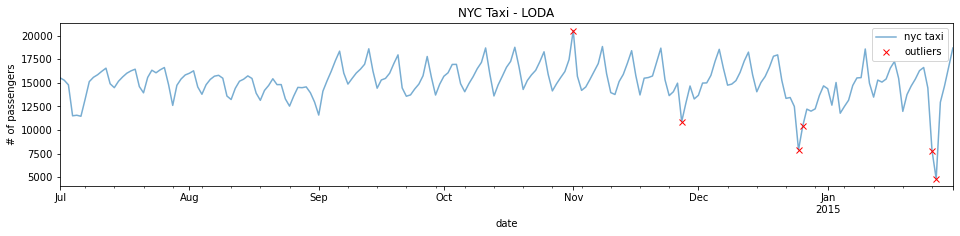

In [240]:
plot_outliers(outliers, tx, 'LODA')

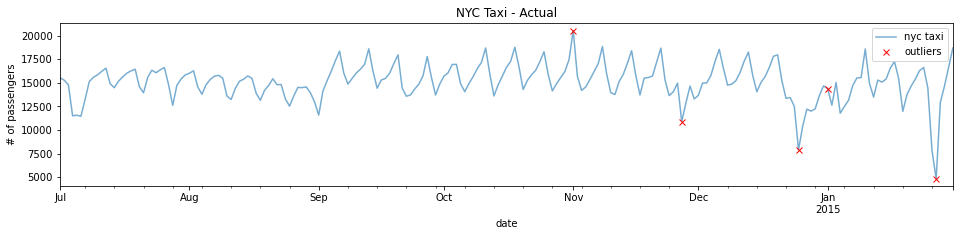

In [241]:
plot_outliers(known_outliers, tx, 'Actual')

# Detecting Outliers using One Class SVM

In [372]:
from pyod.models.ocsvm import OCSVM

In [373]:
ocsvm = OCSVM(contamination=0.03, kernel='rbf')
ocsvm.fit(tx)

OCSVM(cache_size=200, coef0=0.0, contamination=0.03, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [374]:
predicted = pd.Series(ocsvm.predict(tx), 
                      index=tx.index)

In [375]:
print('Number of outliers = ', predicted.sum())

Number of outliers =  5


In [376]:
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-08-09,15499.708333
2014-11-18,15499.437500
2014-11-27,10899.666667
2014-12-24,12502.000000
2015-01-05,12502.750000


In [377]:
known_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


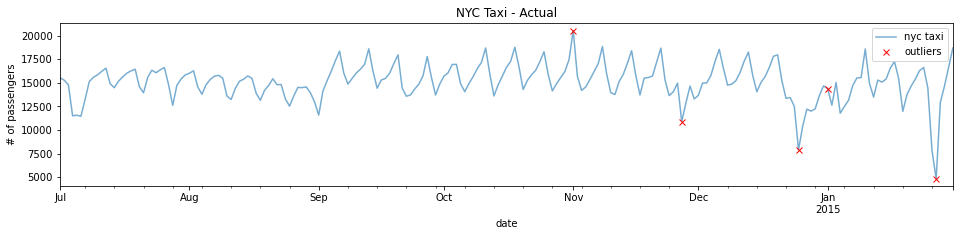

In [359]:
plot_outliers(known_outliers, tx, 'Actual')

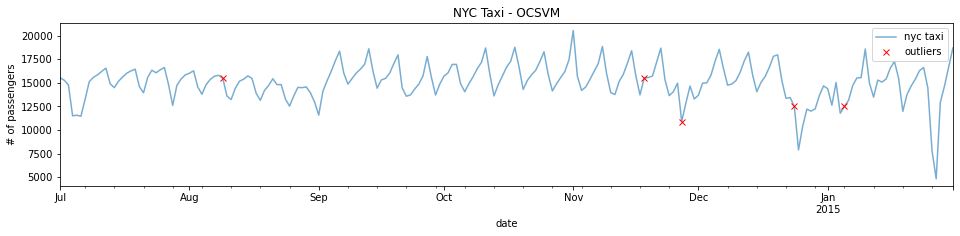

In [360]:
plot_outliers(outliers, tx, 'OCSVM')

In [378]:
from pyod.utils.utility import standardizer
scaled = standardizer(tx)
predicted = pd.Series(ocsvm.fit_predict(scaled), 
                      index=tx.index)
outliers = predicted[predicted == 1]
outliers = tx.loc[outliers.index] 
outliers

,value
timestamp,
2014-07-06,11464.270833
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


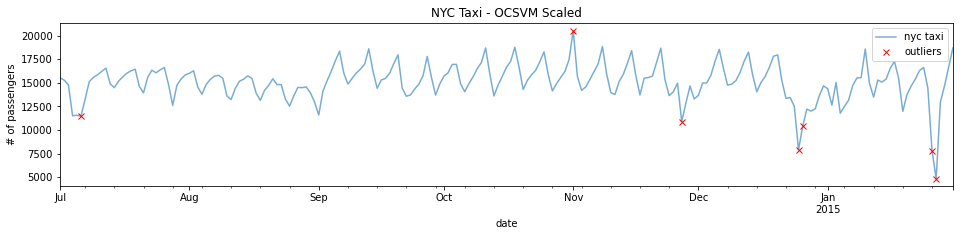

In [379]:
plot_outliers(outliers, tx, 'OCSVM Scaled')

## There is more

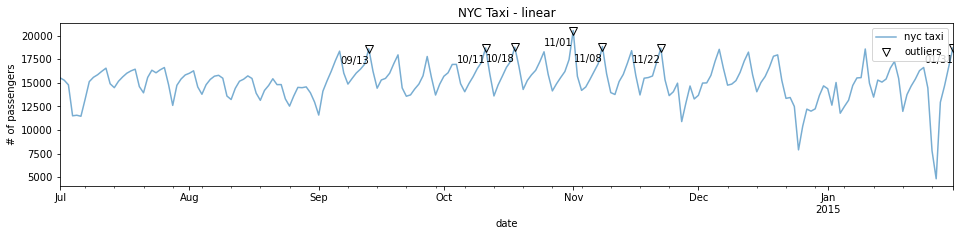

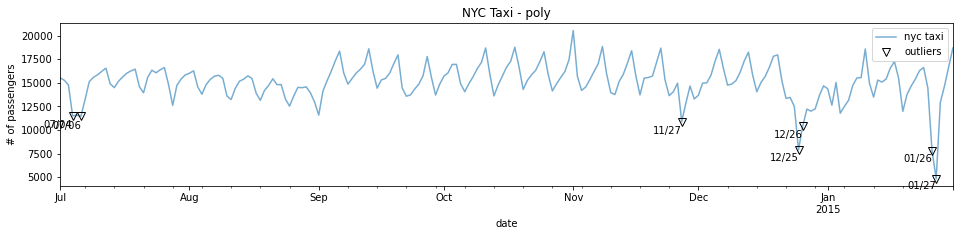

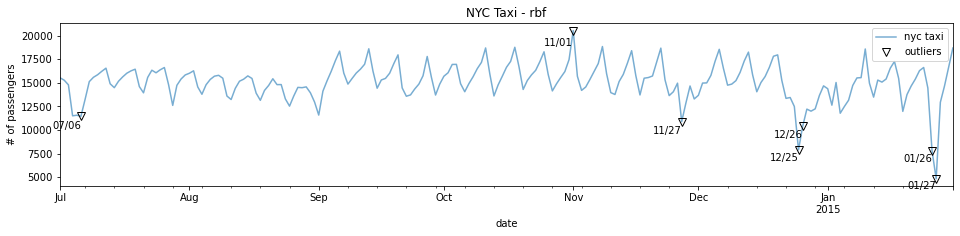

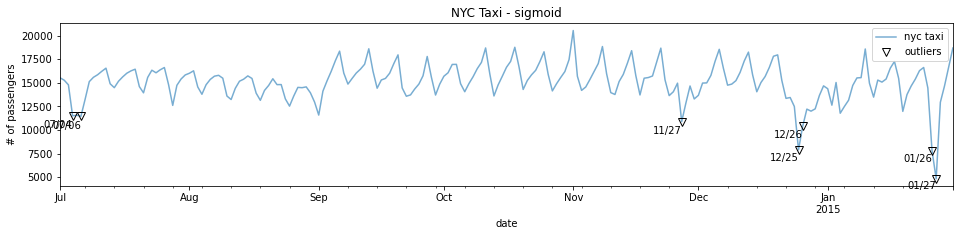

In [317]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    ocsvm = OCSVM(contamination=0.03, kernel=kernel)
    predict = pd.Series(ocsvm.fit_predict(scaled), 
                      index=tx.index, name=kernel)
    outliers = predict[predict == 1]
    outliers = tx.loc[outliers.index]
    plot_outliers(outliers, tx, kernel, labels=True)
    